# ДЗ по "Сбор и разметка данных (семинары)"
## Семинар 4. Парсинг HTML. XPath
* Домашнее задание:  
- Выберите веб-сайт с табличными данными, который вас интересует.
Напишите код Python, использующий библиотеку requests для отправки HTTP GET-запроса на сайт и получения HTML-содержимого страницы.
Выполните парсинг содержимого HTML с помощью библиотеки lxml, чтобы извлечь данные из таблицы.
Сохраните извлеченные данные в CSV-файл с помощью модуля csv.  
- Ваш код должен включать следующее:  
- Строку агента пользователя в заголовке HTTP-запроса, чтобы имитировать веб-браузер и избежать блокировки сервером.
Выражения XPath для выбора элементов данных таблицы и извлечения их содержимого.
Обработка ошибок для случаев, когда данные не имеют ожидаемого формата.
Комментарии для объяснения цели и логики кода.  
- Примечание: Пожалуйста, не забывайте соблюдать этические и юридические нормы при веб-скреппинге.

In [1]:
# # Устанавливаем пакеты, если они не установлены
# !pip install lxml

In [2]:
from lxml import html 
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Загружаем страницу и парсим её

In [3]:
# Определение целевого URL
url = 'https://www.cbr.ru/currency_base/daily/'

In [4]:
# Отправка HTTP GET запроса на целевой URL с пользовательским заголовком User-Agent
response = requests.get(url, headers = {
   'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'})

In [5]:
# Парсинг HTML-содержимого ответа с помощью библиотеки lxml
tree = html.fromstring(response.content)
# Использование выражения XPath для выбора всех строк таблицы в пределах таблицы с классом 'data'
table_rows = tree.xpath("//table[@class='data']//tr")

In [6]:
# Список всех валют
currency_list = []

# Добавляем в список с валютами словарь каждой валюты
for item in table_rows:
    list_item = item.xpath(".//td/text()")
    if len(list_item):
        currency = {}
        
        # Изменяем формат столбца 'код валюты' str->int
        try:
            currency['digital_code'] = int(list_item[0])
        except ValueError:
            currency['digital_code'] = None
            
        currency['letter code'] = list_item[1]

        # Изменяем формат столбца 'еденицы' str->int
        try:
            currency['units'] = int(list_item[2])
        except ValueError:
            currency['units'] = None
            
        currency['currency_name'] = list_item[3]

        # Изменяем формат столбца 'курс' str->float
        try:
            currency['rate'] = float(list_item[4].replace(',', '.'))
        except ValueError:
            currency['rate'] = None
            
        currency_list.append(currency)

## Записываем CSV файл

In [7]:
CSV_FILE = 'currency.csv'

# Запись файла
with open(CSV_FILE, 'w', newline='', encoding='utf-8') as f_write:
    fieldnames = ['digital_code', 'letter code', 'units', 'currency_name', 'rate']
    writer = csv.DictWriter(f_write, fieldnames=fieldnames, dialect='excel', delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    # Записываем заголовки столбцов
    writer.writeheader()
    # Записываем все данные
    writer.writerows(currency_list)
    

## Проверим как у нас записалось в CSV файл

In [8]:
# Читаем наш CSV и преобразовывоем его в датафрем
data = pd.read_csv(CSV_FILE)
df = pd.DataFrame(data, columns=['digital_code', 'letter code', 'units', 'currency_name', 'rate'])

In [9]:
# Посмотрим инфу о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   digital_code   43 non-null     int64  
 1   letter code    43 non-null     object 
 2   units          43 non-null     int64  
 3   currency_name  43 non-null     object 
 4   rate           43 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB


In [10]:
# Выведем курсы валют
df.head(100)

,digital_code,letter code,units,currency_name,rate
0,36,AUD,1,Австралийский доллар,60.2661
1,944,AZN,1,Азербайджанский манат,54.2722
2,51,AMD,100,Армянских драмов,23.3896
3,933,BYN,1,Белорусский рубль,28.3903
4,975,BGN,1,Болгарский лев,51.0227
5,986,BRL,1,Бразильский реал,18.5070
6,348,HUF,100,Венгерских форинтов,25.1171
7,410,KRW,1000,Вон Республики Корея,68.5357
8,704,VND,10000,Вьетнамских донгов,38.4380
9,344,HKD,1,Гонконгский доллар,11.8119


## Визуализируем данные 

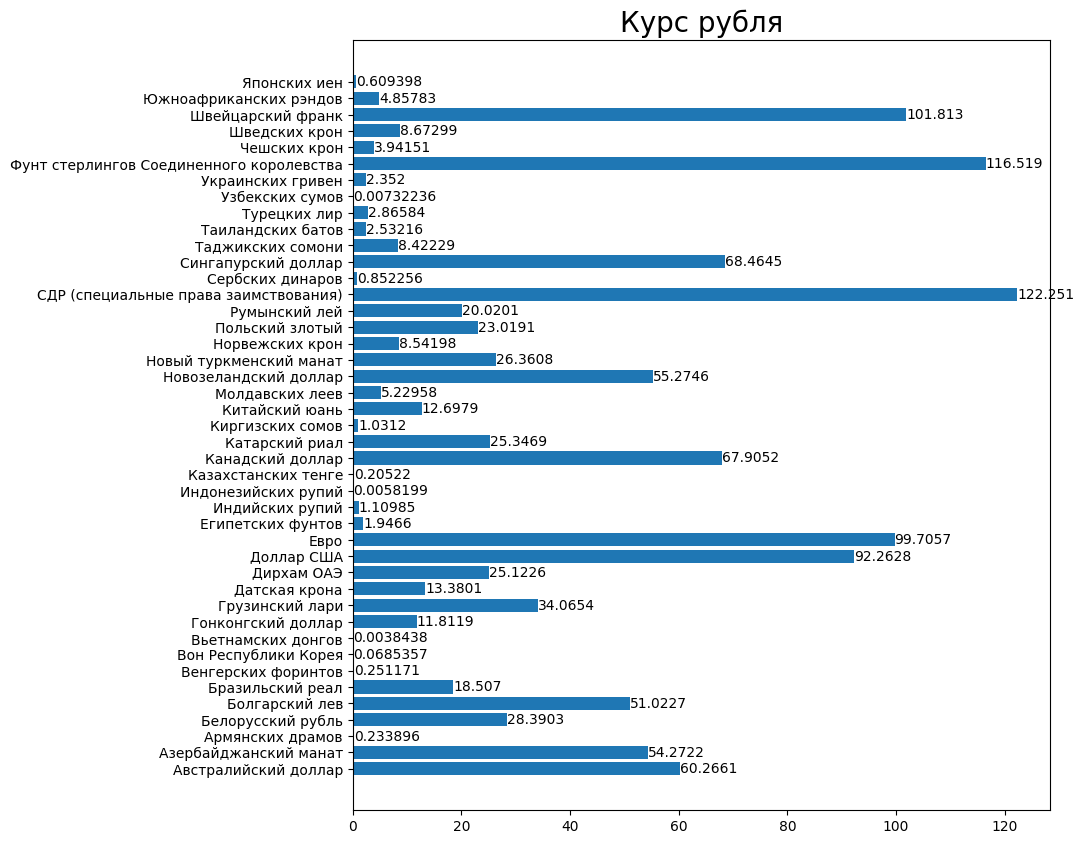

In [11]:
vals = df['currency_name']
labels = df['rate']/df['units']
# Создаем полотно с размерами 9х10 дюймов
fig, ax = plt.subplots(figsize=(9,10))
# Заголовок графика
plt.title('Курс рубля', fontsize=20)
bars = ax.barh(vals, labels)
ax.bar_label(bars)
# Размер шрифта подписей
plt.rc('font', size=7) 
plt.show()

## Вывод: 
### Научился парсить WEB страницу с помощью  XPath запросов, освежил в памяти работу с CSV файлами, дата фреймами Pandas и визуализацию данных.
### Для примера взял курсы валют с сайта ЦБ РФ.